# Logistic Regression
### Dealing with Independent variables that are both Categorical and Integers

In [1]:
import pandas as pd
import numpy as np

#import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score,average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [2]:
#to load csv
df = pd.read_csv('logistic_regression_data.csv')
#data taken from Kaggle that has combined 4 datasets to predict heart disease
#https://www.kaggle.com/imnikhilanand/heart-attack-prediction

### Research question: What factors affect the chances of getting heart disease?
#### Y is dependent variable called 'target' where 0 = no heart disease, 1 = yes heart disease
#### X are the explanatory variables and are all columns except index and target

# Data cleaning

In [3]:
df.head()

,age,gender,chest_pain,resting_bps,chol,fasting_blood_sugar,resting_ecg,max_heartrate,ex_angina,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [4]:
#to see if there are any missing values
print(df.shape)
df.isnull().sum()

(294, 11)


age                     0
gender                  0
chest_pain              0
resting_bps             1
chol                   23
fasting_blood_sugar     8
resting_ecg             1
max_heartrate           1
ex_angina               1
oldpeak                 0
target                  0
dtype: int64

### To remove rows with missing values

In [5]:
print(df.shape)

# drop rows with missing values
df.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print(df.shape)

(294, 11)
(261, 11)


In [6]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
resting_bps            0
chol                   0
fasting_blood_sugar    0
resting_ecg            0
max_heartrate          0
ex_angina              0
oldpeak                0
target                 0
dtype: int64

In [7]:
#from https://www.justintodata.com/logistic-regression-example-in-python/
# 5 Categorical variables are 
# gender (1 = male, 0 = female), 
# chest_pain (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
# fasting_blood_sugar > 120 mg/dl (1 = true; 0 = false)
# resting_ecg (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertroph)
# ex_angina is for exercise-induced angina (1 = yes; 0 = no)

# Among the 5 categorical variables, gender, fasting_blood_sugar, and ex_angina only have two levels of 0 and 1, 
# so they are already in the dummy variable format. 
# But we still need to convert chest_pain and resting_ecg into dummy variables.

In [8]:
df['chest_pain'].value_counts(dropna=False)
# shows 4 classes

4    113
2     92
3     46
1     10
Name: chest_pain, dtype: int64

In [9]:
df['resting_ecg'].value_counts(dropna=False)
# shows 3 classes

0.0    208
1.0     47
2.0      6
Name: resting_ecg, dtype: int64

In [10]:
#To get dummy variables and drop first column because it does not identify things
df = pd.get_dummies(df, columns=['chest_pain', 'resting_ecg'], drop_first=True)

df

,age,gender,resting_bps,chol,fasting_blood_sugar,max_heartrate,ex_angina,oldpeak,target,chest_pain_2,chest_pain_3,chest_pain_4,resting_ecg_1.0,resting_ecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


In [11]:
#to set categorical variables as categorical_cols
# and numeric variables as numeric_cols
numeric_cols = ['age', 'resting_bps', 'chol', 'max_heartrate', 'oldpeak']
categorical_cols = list(set(df.columns) - set(numeric_cols) - {'target'})
categorical_cols.sort()

print(numeric_cols)
print(categorical_cols)

['age', 'resting_bps', 'chol', 'max_heartrate', 'oldpeak']
['chest_pain_2', 'chest_pain_3', 'chest_pain_4', 'ex_angina', 'fasting_blood_sugar', 'gender', 'resting_ecg_1.0', 'resting_ecg_2.0']


# Split into Training and Testing datasets
# 20% of original dataset is separated out to be Testing dataset
#### stratify dataset to make sure that the train and test sets have approximately the same percentage of samples of each target class as the complete set

In [12]:
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(208, 14)
(53, 14)

0    0.625
1    0.375
Name: target, dtype: float64

0    0.622642
1    0.377358
Name: target, dtype: float64


# Normalize data by scaling it
#### good to do when your input data has different values (days, inches, lbs)

In [13]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, categorical_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[categorical_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, categorical_cols, scaler)

# Fit the Logistic Regression Model

In [14]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(penalty='none')

# Evaluate the Model

In [15]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, categorical_cols, scaler)

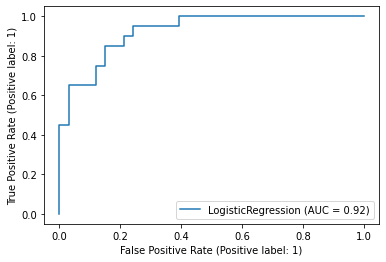

In [16]:
#plot a roc curve
plot_roc_curve(clf, X_test, y_test)

In [17]:
#The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). 
# Classifiers that give curves closer to the top-left corner indicate a better performance. 
#The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

#Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model 
# classifies positive and negative outcomes at all possible cutoffs.
# It can range from 0.5 to 1, and the larger it is the better.

#Our ROC curve is good and our AUC score is good at .92

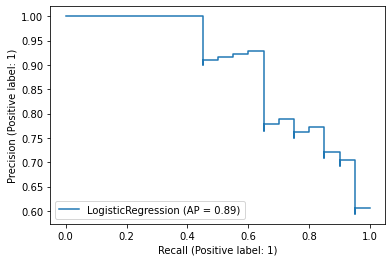

In [18]:
#plot a precision-recall curve
plot_precision_recall_curve(clf, X_test, y_test)

In [19]:
#Good explanation of precision recall curves here: https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

In [20]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [21]:

print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.35613
AUC = 0.92424
Average Precision = 0.89045

Using 0.5 as threshold:
Accuracy = 0.83019
Precision = 0.76190
Recall = 0.80000
F1 score = 0.78049

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.76      0.80      0.78        20

    accuracy                           0.83        53
   macro avg       0.82      0.82      0.82        53
weighted avg       0.83      0.83      0.83        53



Confusion Matrix


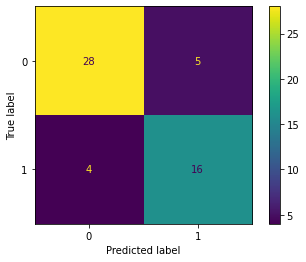

In [22]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [23]:
# We have 28 true negatives, 16 true positives
# We have 4 false negatives, 5 false positivies

# Interpretation

In [24]:
#coefficients = np.hstack((clf.intercept_, clf.coef_[0]))

#pd.DataFrame(data={'variable': ['intercept'] + categorical_cols + numeric_cols, 'coefficient': coefficients})

In [27]:
independent_var = ['age', 'resting_bps', 'chol', 'max_heartrate', 'oldpeak', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4', 'ex_angina', 'fasting_blood_sugar', 'gender', 'resting_ecg_1.0', 'resting_ecg_2.0']
X = df[independent_var] # Independent variables

In [28]:
log_odds = clf.coef_[0]   #put into a dataframe 
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
oldpeak,1.514143
chest_pain_2,1.290292
resting_ecg_2.0,1.231252
max_heartrate,0.514580
gender,0.345501
ex_angina,0.059633
fasting_blood_sugar,-0.013132
resting_ecg_1.0,-0.285511
chest_pain_4,-0.429625
chest_pain_3,-0.638990


In [30]:
#need to convert log odds coefficients to regular odds coefficients
odds = np.exp(clf.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
oldpeak,4.545525
chest_pain_2,3.633847
resting_ecg_2.0,3.425517
max_heartrate,1.672935
gender,1.412697
ex_angina,1.061447
fasting_blood_sugar,0.986954
resting_ecg_1.0,0.751630
chest_pain_4,0.650753
chest_pain_3,0.527825


### Interpretation if coefficients are greater than 1

In [ ]:
# For every one-unit increase in [X variable], the odds that the observation is in (y class) are 
# [coefficient] times as large as the odds that 
# the observation is not in (y class) when all other variables are held constant.”

In [ ]:
# For every one-unit increase in Maximum heartrate, the odds are 1.67 times larger that you have heart disease
# as the odds are that they won't have heart disease
# holding all other variables constant

In [ ]:
#Looking at gender (remember males = 1). Males have 1.41x greater odds of having heart disease than females,
# holding all other features constant

### Interpretation if coefficients are less than 1 or if coefficients are negative
### but idk if this is correct- need to check on it

In [ ]:
# First take 1/coefficient
# For every one-unit increase in [X variable], the odds that the observation NOT (y class) are 
# [coefficient] times as large as the odds that 
# the observation is not in (y class) when all other variables are held constant.”

In [ ]:
# I don't think this is correct!#
#Looking at chest pain, remember typical angina =1. Coefficient of asymptomatic angina (cp_4) = 0.65
# 1/0.65 =1.54
#For every one-unit increase in asymptomatic angina..
# For people with asymptomatic agina, the odds they do not have heart disease are 1.54 times as likely as the odds of them having
#heart disease

In [31]:
#To look at numerical values, think of them in terms of standard deviations
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,age,7.909365
1,resting_bps,18.039942
2,chol,63.470764
3,max_heartrate,24.071915
4,oldpeak,0.891801


In [32]:
#Holding other variables fixed, 
# there is a 41% increase in the odds of having a heart disease 
# for every standard deviation increase in cholesterol (63.470764) since exp(0.345501) = 1.41.